<h1><b>Predicting Depression Among Students: A Machine Learning Approach</b> </h1>

<h2><b>Context</b></h2>
<ul>
    <li>Installing Packages</li>
    <li>Exploratory Data Analysis </li>
    <li>Visualization and Graph Modelling </li>
    <li>Co-relation Matrix</li>
    <li>Test and Train the Dataset</li>
    <li>KNN model</li>
    <li>Logistic Regression </li>
    <li> KNN Accuracy Curve </li>
    <li> ROC Curve </li>
    <li> Predicting the score </li>
    <li>Confusion Matrix</li>
    <li>Finding the best model </li>
    
</ul>

In [1]:
#!pip install xgboost lightgbm


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score,roc_curve,auc,precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
print("All libraries are installed successfully")

All libraries are installed successfully


In [3]:
df = pd.read_csv('sda.csv')

In [4]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [7]:
df.shape

(27901, 18)

In [8]:
df = df.drop(['id'], axis=1)

In [9]:
# Changing the categorical values into numerical
df.loc[df['Gender'] == 'Male', 'Gender'] = 0
df.loc[df['Gender'] == 'Female', 'Gender'] = 1
df.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [10]:
df['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

In [11]:
remove_cities = df['City'].value_counts()[df['City'].value_counts() < 400]
df = df[~df['City'].isin(remove_cities.index)]
df['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [12]:
df['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [13]:
#Removing Profession when not equal to students
df = df.loc[df['Profession'] == 'Student']
df['Profession'].value_counts()

Profession
Student    27844
Name: count, dtype: int64

In [14]:
df = df.drop(['Profession'], axis=1)

In [15]:
df['Work Pressure'].value_counts()

Work Pressure
0.0    27841
5.0        2
2.0        1
Name: count, dtype: int64

In [16]:
df.head(10)

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,1,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,0,29.0,Pune,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,0,30.0,Thane,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,1,30.0,Chennai,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,0,28.0,Nagpur,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,0,31.0,Nashik,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


In [17]:
df['Age'].value_counts()

Age
24.0    2255
20.0    2235
28.0    2128
29.0    1940
33.0    1892
25.0    1780
21.0    1718
23.0    1640
18.0    1586
19.0    1560
34.0    1466
27.0    1459
31.0    1422
32.0    1258
22.0    1159
26.0    1153
30.0    1144
35.0      10
38.0       8
36.0       7
42.0       4
48.0       3
39.0       3
43.0       2
46.0       2
37.0       2
49.0       1
51.0       1
44.0       1
59.0       1
54.0       1
58.0       1
56.0       1
41.0       1
Name: count, dtype: int64

In [18]:
df=df.loc[df['Age'] <= 30]
df['Age'].value_counts()

Age
24.0    2255
20.0    2235
28.0    2128
29.0    1940
25.0    1780
21.0    1718
23.0    1640
18.0    1586
19.0    1560
27.0    1459
22.0    1159
26.0    1153
30.0    1144
Name: count, dtype: int64

In [19]:
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    5785
5.0    5167
4.0    4112
1.0    3546
2.0    3140
0.0       7
Name: count, dtype: int64

In [20]:
df = df.loc[df['Academic Pressure'] > 0]
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    5785
5.0    5167
4.0    4112
1.0    3546
2.0    3140
Name: count, dtype: int64

In [21]:
df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    4825
2.0    4686
3.0    4448
1.0    4336
5.0    3453
0.0       2
Name: count, dtype: int64

In [22]:
df = df.loc[df['Study Satisfaction'] > 0]
df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    4825
2.0    4686
3.0    4448
1.0    4336
5.0    3453
Name: count, dtype: int64

In [23]:
df.head(3)

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
3,1,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [24]:
df = df.drop(['Job Satisfaction'], axis=1)

In [25]:
df['Degree'].value_counts()

Degree
Class 12    5840
B.Ed        1291
B.Arch      1269
B.Com       1261
BCA         1067
MSc          930
B.Tech       841
BHM          768
BSc          750
MCA          736
B.Pharm      665
M.Tech       596
BBA          585
M.Com        561
BA           498
MBBS         471
M.Ed         448
BE           422
MBA          419
M.Pharm      408
MA           384
LLB          378
PhD          316
MD           294
LLM          267
MHM          128
ME           127
Others        28
Name: count, dtype: int64

In [26]:
df.head(10)

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24.0,Bangalore,2.0,0.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
3,1,28.0,Varanasi,3.0,0.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,0.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,0,29.0,Pune,2.0,0.0,5.70,3.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,0,30.0,Thane,3.0,0.0,9.54,4.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,1,30.0,Chennai,2.0,0.0,8.04,4.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,0,28.0,Nagpur,3.0,0.0,9.79,1.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
10,0,24.0,Nagpur,3.0,0.0,6.10,3.0,5-6 hours,Moderate,Class 12,Yes,11.0,1.0,Yes,1
12,0,27.0,Kalyan,5.0,0.0,7.04,1.0,Less than 5 hours,Moderate,M.Tech,No,10.0,1.0,Yes,1
13,1,19.0,Rajkot,2.0,0.0,8.52,4.0,Less than 5 hours,Unhealthy,Class 12,No,6.0,2.0,Yes,0


In [27]:
#Check the sleep duration and remove "Others" due to the low count
df['Sleep Duration'].value_counts()
df = df.loc[df['Sleep Duration'] != 'Others']
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    6515
7-8 hours            5732
5-6 hours            4787
More than 8 hours    4702
Name: count, dtype: int64

In [28]:
#Changing the categorical values into Numerical values for "Sleep Duration"
df.loc[df['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
df.loc[df['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 1
df.loc[df['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 2
df.loc[df['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 3
df['Sleep Duration'].value_counts()

Sleep Duration
0    6515
2    5732
1    4787
3    4702
Name: count, dtype: int64

In [29]:
#Check the dietary habits and remove "Others"
df['Dietary Habits'].value_counts()
df =df.loc[df['Dietary Habits'] != 'Others']
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    8353
Moderate     7591
Healthy      5783
Name: count, dtype: int64

In [30]:
df.loc[df['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 0

df.loc[df['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 1

df.loc[df['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 3

df['Dietary Habits'].value_counts()

Dietary Habits
1    8353
3    7591
0    5783
Name: count, dtype: int64

In [31]:
df['Degree'].unique()

array(['BSc', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed', 'M.Ed', 'MSc',
       'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Pharm', 'B.Com', 'MD', 'BE',
       'BA', 'MBBS', 'B.Arch', 'LLM', 'B.Tech', 'BBA', 'M.Com', 'ME',
       'MBA', 'LLB', 'Others', 'MHM'], dtype=object)

In [32]:
df.loc[df['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', regex=True), 'New_Degree'] = 'Graduated'
df.loc[df['Degree'].str.contains(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM', regex=True), 'New_Degree'] = 'Post Graduated'
df.loc[df['Degree'] == 'Class 12', 'New_Degree'] = 'Higher Secondary'
df = df.loc[df['Degree'] != 'Others']
df['New_Degree'].value_counts()

New_Degree
Graduated           9782
Higher Secondary    5839
Post Graduated      4870
Name: count, dtype: int64

In [33]:
#Change "New Degree" to Numerical
df.loc[df['New_Degree'] == 'Graduated', 'New_Degree'] = 0
df.loc[df['New_Degree'] == 'Post Graduated', 'New_Degree'] = 1
df.loc[df['New_Degree'] == 'Higher Secondary', 'New_Degree'] = 2
df['New_Degree'].value_counts()

New_Degree
0    9782
2    5839
1    4870
Name: count, dtype: int64

In [34]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    14265
No      7434
Name: count, dtype: int64

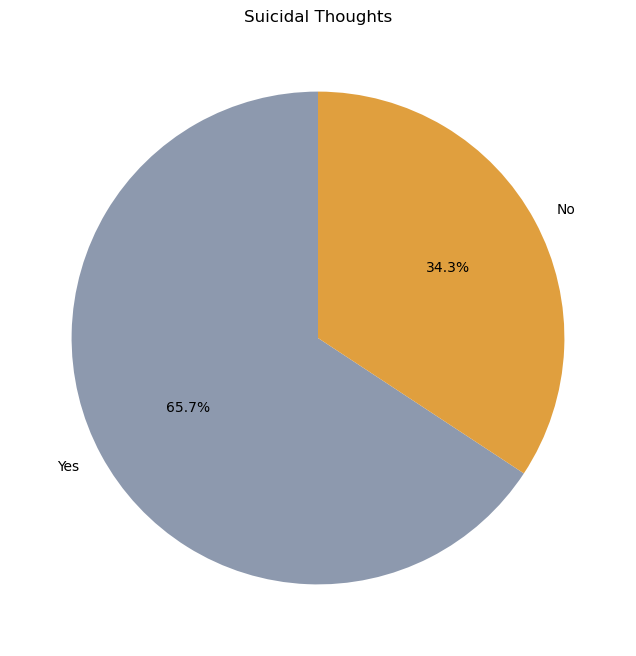

In [35]:
suicidal_thoughts = df['Have you ever had suicidal thoughts ?'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(suicidal_thoughts, labels=suicidal_thoughts.index, autopct='%1.1f%%', colors=['#8d99ae','#e09f3e'], startangle=90)
plt.title("Suicidal Thoughts")
plt.show()

In [36]:
df.loc[df['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
df.loc[df['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
1    14265
0     7434
Name: count, dtype: int64

In [37]:
df['Financial Stress'].value_counts()

Financial Stress
5.0    5456
4.0    4614
3.0    4044
2.0    3900
1.0    3683
Name: count, dtype: int64

In [38]:
df['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    3358
12.0    2443
11.0    2320
8.0     1928
6.0     1758
9.0     1601
7.0     1585
0.0     1272
2.0     1229
4.0     1224
3.0     1098
5.0      994
1.0      889
Name: count, dtype: int64

In [39]:
df['Gender'].value_counts()

Gender
0    11997
1     9702
Name: count, dtype: int64

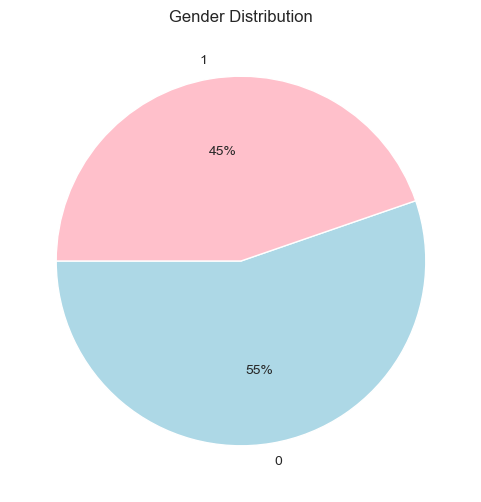

In [40]:
sns.set_style('whitegrid')

plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(colors = ['lightblue','pink'],startangle=180,autopct='%.0f%%')
plt.title("Gender Distribution")
plt.ylabel('')

plt.show()

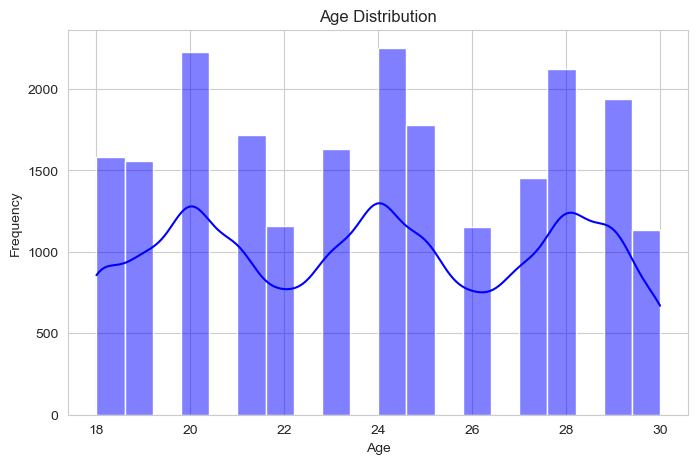

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution", fontsize=12)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

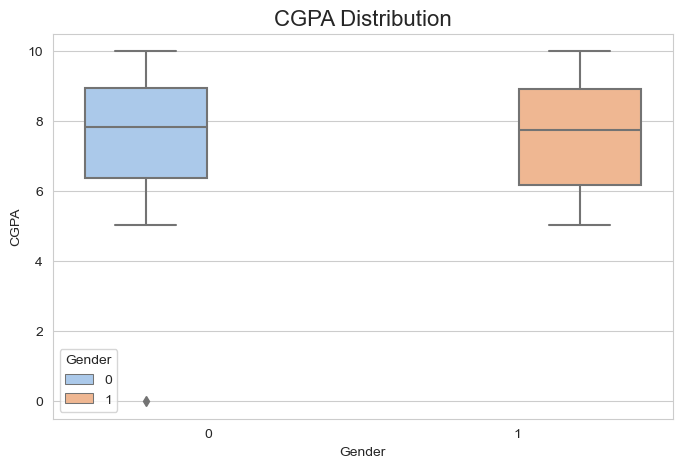

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="CGPA", hue = "Gender", data=df, palette="pastel")
plt.title("CGPA Distribution", fontsize=16)
plt.show()

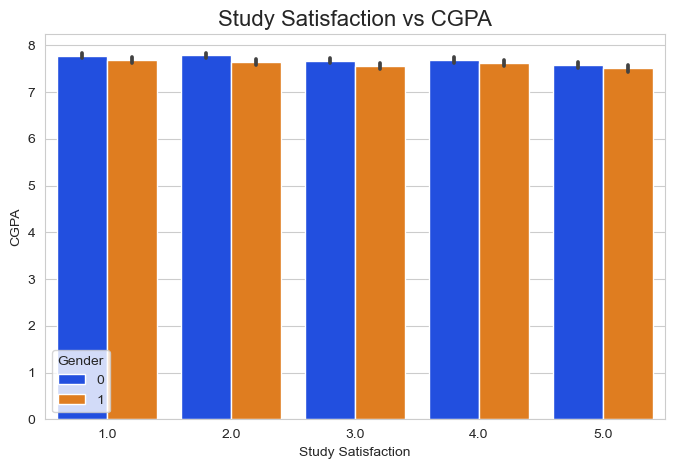

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Study Satisfaction", y="CGPA", hue="Gender", data=df, palette="bright")
plt.title("Study Satisfaction vs CGPA", fontsize=16)
plt.show()

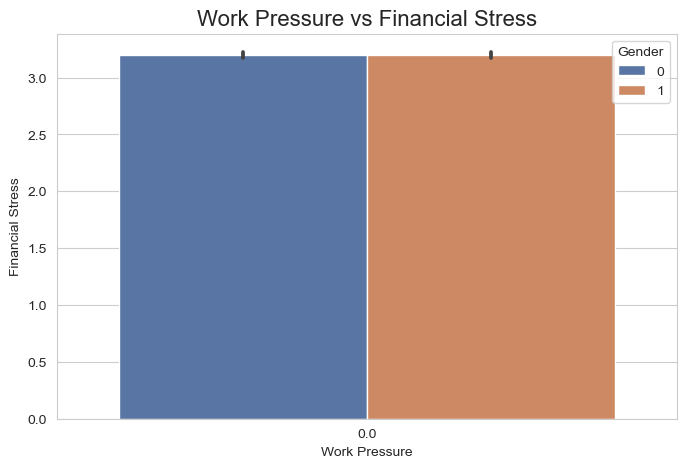

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Work Pressure", y="Financial Stress", hue="Gender", data=df, palette="deep")
plt.title("Work Pressure vs Financial Stress", fontsize=16)
plt.show()

In [45]:
df = df.drop(['Work Pressure'], axis=1)

In [46]:
#Checking Family History of Mental Illness
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     11190
Yes    10509
Name: count, dtype: int64

In [47]:
df.loc[df['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
df.loc[df['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
0    11190
1    10509
Name: count, dtype: int64

In [48]:
df.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,Bangalore,2.0,5.90,5.0,1,3,BSc,0,3.0,2.0,1,0,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,3,BCA,1,4.0,5.0,1,1,0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,3,M.Tech,1,1.0,1.0,0,0,1


In [49]:
df.isnull().sum()
df = df.dropna()

## CREATING A NEW DF TO CHECK IF THERE IS ANY CORRELATION BETWEEN THE NUMERIC VARIABLES
main_data = df[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree']]
main_data.head(3)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,2.0,5.90,5.0,1,3,0,3.0,2.0,1,0,0
3,1,28.0,3.0,5.59,2.0,2,3,1,4.0,5.0,1,1,0
4,1,25.0,4.0,8.13,3.0,1,3,1,1.0,1.0,0,0,1


In [50]:
main_data.dtypes


Gender                                    object
Age                                      float64
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
New_Degree                                object
dtype: object

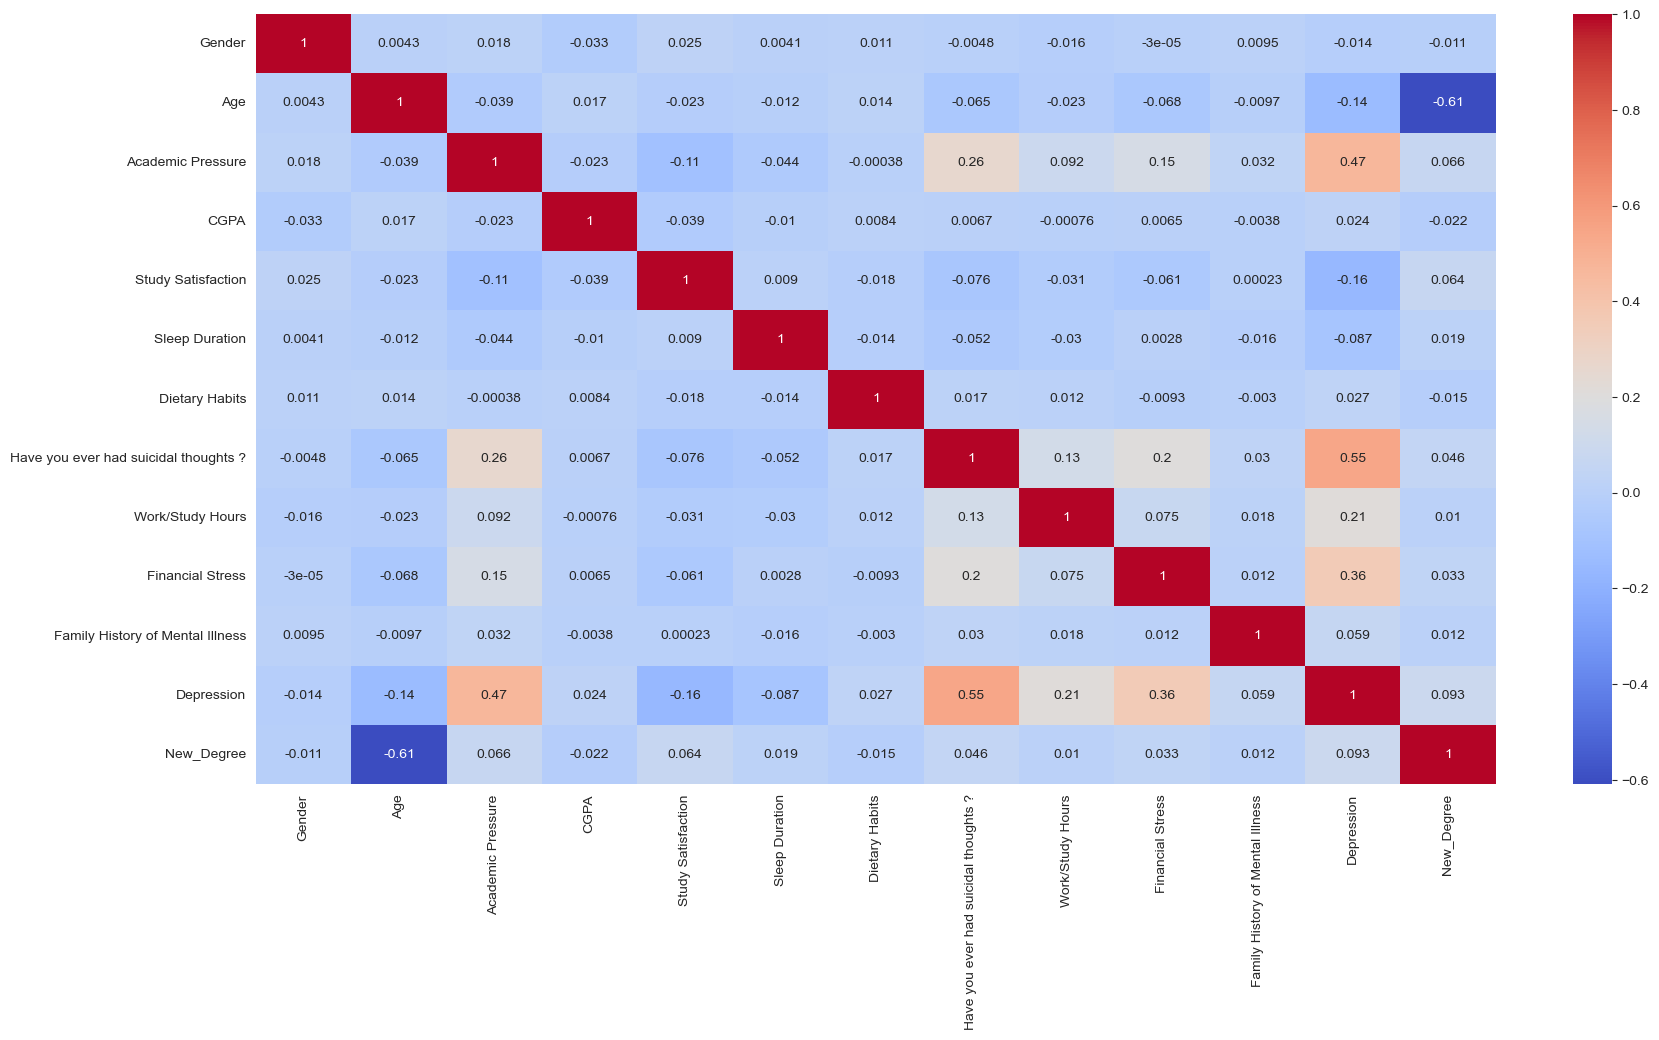

In [51]:
#Correlation Matrix
plt.figure(figsize=(20, 10))
sns.heatmap(main_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [52]:
# Creating dummy variables for the 'city'(Columns)

encoder = OneHotEncoder(sparse_output=False)  
encoded = encoder.fit_transform(df[['City']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))
# Adjust the index
encoded_df.index = df.index
df_encoded = pd.concat([df, encoded_df], axis=1)

#Check the new Dataframe
df_encoded.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree', 'City_Agra', 'City_Ahmedabad', 'City_Bangalore',
       'City_Bhopal', 'City_Chennai', 'City_Delhi', 'City_Faridabad',
       'City_Ghaziabad', 'City_Hyderabad', 'City_Indore', 'City_Jaipur',
       'City_Kalyan', 'City_Kanpur', 'City_Kolkata', 'City_Lucknow',
       'City_Ludhiana', 'City_Meerut', 'City_Mumbai', 'City_Nagpur',
       'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot',
       'City_Srinagar', 'City_Surat', 'City_Thane', 'City_Vadodara',
       'City_Varanasi', 'City_Vasai-Virar', 'City_Visakhapatnam'],
      dtype='object')

In [53]:
# Remove the old city and degree column
df_encoded = df_encoded.drop(['City', 'Degree'], axis=1)

In [54]:
# Split data into features and target variable
X = df_encoded.drop('Depression', axis=1).values  # Features
y = df_encoded['Depression'].values  # Target

In [55]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Model Accuracy: 0.813079551000488
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1471
           1       0.82      0.91      0.86      2627

    accuracy                           0.81      4098
   macro avg       0.81      0.78      0.79      4098
weighted avg       0.81      0.81      0.81      4098



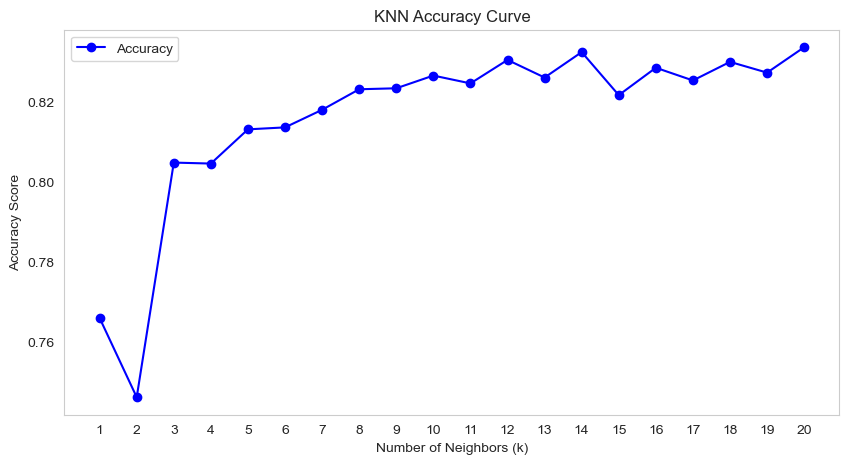

In [58]:
# Define a range of k values
k_values = range(1, 21)
accuracy_scores = []

# Iterate through different k values and store accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot the KNN curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("KNN Accuracy Curve")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()


In [59]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8530990727183992
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1471
           1       0.87      0.91      0.89      2627

    accuracy                           0.85      4098
   macro avg       0.84      0.83      0.84      4098
weighted avg       0.85      0.85      0.85      4098



Logistic Regression Accuracy: 0.8530990727183992
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1471
           1       0.87      0.91      0.89      2627

    accuracy                           0.85      4098
   macro avg       0.84      0.83      0.84      4098
weighted avg       0.85      0.85      0.85      4098



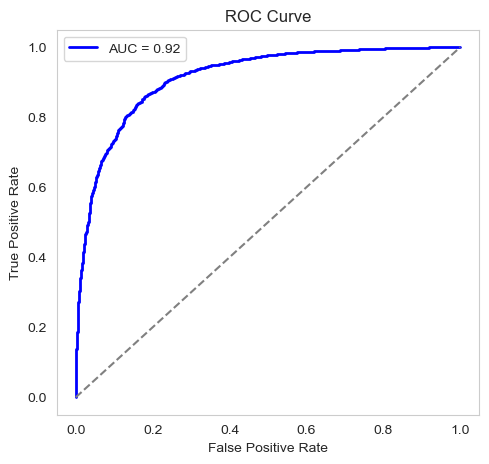

In [60]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for ROC

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()

In [61]:
depression_probs = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability of "Depressed" class

student_results = pd.DataFrame({# Replace with actual student IDs if available
    "Depression_Score": depression_probs,
    "Prediction": ["Depressed" if p >= 0.5 else "Non-Depressed" for p in depression_probs]
})

# Display results
print(student_results.head())

   Depression_Score     Prediction
0          0.352464  Non-Depressed
1          0.180042  Non-Depressed
2          0.633768      Depressed
3          0.330996  Non-Depressed
4          0.985688      Depressed


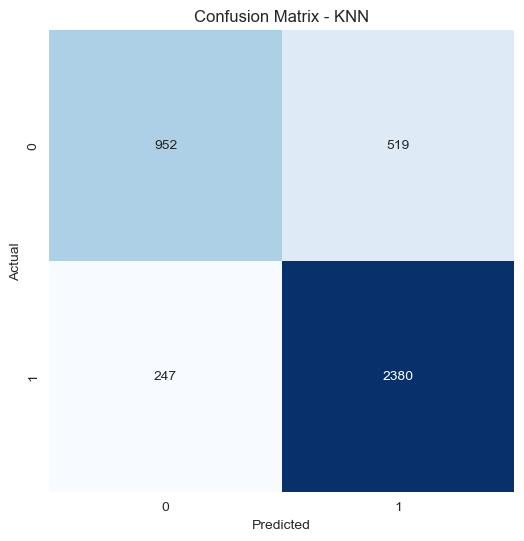

In [62]:
# Confusion Matrix for KNN
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


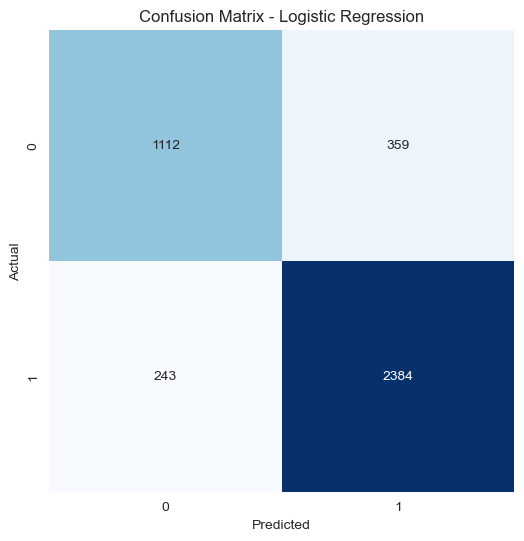

In [63]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [64]:
# Compare accuracies
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

# Choose the best model based on accuracy or other metrics
if accuracy_score(y_test, y_pred_knn) > accuracy_score(y_test, y_pred_lr):
    print("Final Output: KNN performs better.")
else:
    print("Final Output: Logistic Regression performs better.")


KNN Accuracy: 0.8131
Logistic Regression Accuracy: 0.8531
Final Output: Logistic Regression performs better.


<b>Resources</b> <br>
Dataset Source: Kaggle

<b>Author</b><br>
Shreemirra Ramesh

